Одна из самых популярных постановок, является задача о поиске наилучшего приближения заданной матрицы матрицей малого ранга:

$$
\begin{align*}
& \min_{X} rk(X) \\
& X_{i,j} = Y_{i,j}, \quad (i,j) \in E\\
\end{align*}
$$
Как известно, в общем случае эта задача является NP-трудной.

Для того, чтобы обойти это припятствие ранк матрицы аппроксимируется той или иной выпуклой функцией от матрицы $X$.

Опять же стандартным выбором является переход к постановке задачи с использованием 1-й нормы Шаттена (она же trace norm).

$\textbf{RegMC problem}$

$$
\begin{align*}
& \min_{X}\|X \|_* \\
& X_{i,j} = Y_{i,j}, \quad (i,j) \in E\\
\end{align*}
$$

Здесь $X_* = \sum \sigma_i(X)$. 

1) Найдем аналитическую запись для градиента сглаженной версии целевого функционала. Для этого найдем двойственную функцию для trace norm:
$$
f^{*}(Y) = \sup_{X} <X,Y>_{F} - ||X||_{tr}
$$
Докажем следующее неравенство:
$$
<X,Y>_* \leq ||X||_{tr}\cdot||Y||_2
$$
Чтобы это сделать воспользуемся следующим фактом, что $\forall (i,j) \ |A_{i,j}|\leq||A||_2$
Тогда, используя SVD разложение $X = VDW$ и свойста следа, получим:
$$
\langle X,Y\rangle=\text{Tr}(Y^TX)=\text{Tr}(Y^TVDW)=\text{Tr}(WY^TV\,D)=\text{Tr}((VYW)^T\,D)\\=\sum_{k=1}^M\sum_{j=1}^N(VYW)^T_{kj}D_{jk}=\sum_{k=1}^{\min{M,N}}(VYW)^T_{kk}\,\sigma_k(X)\leq\|VYW\|_2\,\sum_{k=1}^{\min{M,N}}\sigma_k(X)\\
=\|VYW\|_2\,\|X\|_{tr}=\|Y\|_2\,\|X\|_{\rm tr}.
$$
В соотвествии с этим фактом, получим:
$$
f^{*}(Y) = \sup_{X} <X,Y>_{F} - ||X||_{tr} \leq \sup_{X} ||X||_{tr}\cdot||Y||_2 - ||X||_{tr} = \sup_{X} (1 - ||Y||_2)\cdot||X||_{tr}
$$
Так как $||X||_{tr} \geq 0$, то:
$$
\begin{equation*}
f^{*}(Y) = 
 \begin{cases}
 0 & ||Y||_2 \leq 1 \\
 \infty & else
 \end{cases}
\end{equation*}
$$
Докажем, что данный супремум достижим. В случае, если $||Y||_2 \leq 1$, то коректность очевидна, так как можно взять нулевую матрицу и получить 0. В случае, если $||Y||_2 \geq 1$, то возьмем X, у которого первое сингулярное число равно $\alpha \cdot \sigma_{y}$. Тогда $\sup_{X} <X,Y>_{F} - ||X||_{tr} = \sup_{\alpha} \alpha \cdot \sigma_{y}^2 - \alpha \cdot \sigma_{y} = \infty$ (если устремить $\alpha$ к бесконечтности).<p>  
Используем полученный результат, для построения сглаженной целевой функции.<p>
Согласно описанию, сглаженная функция имеет следующий вид:
$$
f_{\mu}(x) = max_{u} {<Ax,u> - \phi(u) - \mu \cdot \ d(u)}
$$
В качестве $\phi(u)$ возьмем полученную двойственную функцию, в качестве прокс функции, возьмем функцию из описания задачи.<p> 
Тогда:
$$
f_{\mu}(x) = max_{y : \ ||y||_2 \leq 1} {<X,Y>_{F} - \mu/2||Y||_F^2}
$$
Согласно описанию, градиент такой функции:
$$
\nabla f_{\mu}(x) = argmax_{y : ||y||_2 \leq 1}{<X,Y>_{F} - \mu/2||Y||_F^2}
$$
Выдилим полный квадрат:
$$
<X,Y>_{F} - \mu/2||Y||_F^2 = <X,Y>_{F} - \mu/2||Y||_F^2 - 1/\mu \cdot <X,X>_{F} + 1/\mu \cdot <X,X>_F
$$
Тогда:
$$
max_{y} {<X,Y>_{F} - \mu/2||Y||_F^2 - 1/\mu \cdot <X,X>_{F} + 1/\mu \cdot <X,X>_F} = min_{y} {-<X,Y>_{F} + \mu/2||Y||_F^2 + 1/\mu \cdot <X,X>_{F} - 1/\mu \cdot <X,X>_F} = min_{y} ||1/\sqrt{\mu}X - \sqrt{\mu/2}Y||_F^2 - 1/\mu \cdot <X,X>_F =  min_{y} \mu/2 \cdot ||1/\mu X - Y||_F^2 - 1/\mu \cdot <X,X>_F
$$
Заметим, что только $||1/\mu X - Y||_F^2$ влияет на достижение минимума функции. А это слогаемое эквивалентно задаче минимизации матрицей наименьшего ранга. Можнно заметить, что минимум достижим тогда, когда Y сингулярное разложение совпадает. Но так как у нас стоит ограничение на спектральную норму, то сингулярное число выбирается как $min([\sigma_{x}/mu, 1])$. Используя такую матрицу, можно достигнуть минимума. Таким образом :
$$
\nabla f_{\mu}(x) = \sum_{i}{min([\sigma_{x,i}/mu, 1]) \cdot v_i u_i^T}
$$


2) Согласно полученненой сглаженной функции, построим быстрый градиентный спуск.
Для начала определим контанту липшца L.
Согласно теории и полученным расчетам, получаем:
$$
L = \frac{1}{(\mu)}
$$
Тогда:
$$
y_k = argmin_{y} {<\nabla f(x), y - x> + \frac{1}{2}\cdot L \cdot ||y-x||_F^2} \\
y_k = \frac{1}{\mu}\cdot X - \nabla f(x) \\
z_k = argmin_{x} {\frac{L}{\sigma}\cdot d(x) + \sum_{i=1}^{k}{\frac{i+1}{2} \cdot [f(x_i) + <\nabla f(x_i), x - x_i>]}} \\
z_k = -\mu \sum_{i=1}^{k}{\frac{i+1}{2} \cdot \nabla f(x_i)} \\
x_k = \frac{2}{k+3} \cdot z_k \frac{k+1}{k+3} \cdot y_k
$$ 


Для реализации полученной схемы импотрируем необходимые библеотеки и реализуем функции необходимые для работы метода и решение дальнейших задач.

In [1]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.datasets import fetch_lfw_people
from collections import defaultdict

Реализуем функцию, которая заполняет матрицу по указанным индексами определенными значениями.

In [2]:
def fillNA(X, ind, y):
    X_copy = X.copy()
    X_copy = X_copy.reshape(-1)
    X_copy[ind] = y
    return X_copy.reshape(X.shape)

Реализуем функцию, которая "выбивает" пиксели из картинки. На вход берется картинка, и отношение выбитых пикселей. Функция будет возвращать индексы пикселей, которые не были выбиты, индексы пикслей, которые были выбиты и значение пиксилей, которые не были выбиты.

In [108]:
def beat_img(img, p=0.8):
    A_copy = img.copy().reshape(-1)
    rnd = np.random.choice(list(range(A_copy.shape[0])), int((1-p)*A_copy.shape[0]), replace=False)
    del_ind = np.array(list(set(list(range(A_copy.shape[0]))) - set(rnd)))
    return rnd, A_copy[rnd], del_ind

Реализуем описанную схему.

In [109]:
#градиент функции
def gradX(X, mu):
    #SVD разложение матрицы
    S, V, D = np.linalg.svd(X)
    h = lambda x, mu : x/mu if mu >=x else 1
    res = np.zeros(X.shape)
    #подсчет градиента
    for i in range(V.shape[0]):
        res += h(V[i],mu)*np.outer(S[:,i],D.T[:,i])
    return res 
#минимизируемая функция
def fu(X, mu):
    #SVD разложение матрицы
    S, V, D = np.linalg.svd(X)
    h = lambda x, mu : x**2/mu/2 if mu >= x else x - mu/2
    res = 0
    #подсчет значения функции
    for i in range(V.shape[0]):
        res += h(V[i],mu)
    return res 
#градиентный спуск
def fast_grad_des(X0, index_full, y, mu, e = 0.0001, max_iter = 1000):
    #иницилизация параметров
    X = X0.copy()
    k = 0
    acc_gradX = 0
    #реализация схемы
    while(True):
        new_grad = gradX(X, mu)
        f1 = fu(X, mu)
        acc_gradX = acc_gradX + (k+1)/2*new_grad
        y = 1/mu*X - new_grad
        z = -mu*acc_gradX
        X = 2/(k+3)*z + (k+1)/(k+3)*y
        X = fillNA(X, index_full, y_true)
        f2 = fu(X, mu)
        #критерий остановы
        if (abs(f1 - f2) < e):
            return X, k
        grad = new_grad
        k += 1
        if(k >= max_iter):
            print('Достигнуто максимальное количество итераций')
            print('GD',abs(f1 - f2))
            return X, k

Проверим работаспособность описанной схемы. Для этого возьмем mu равное 1 и произвольную картинку (сделав ее черно-белой) и выбьем из нее 70% пикселей и постараемся востановить выбитые пиксили полученным методом.

Text(0.5, 1.0, 'Востановленная картинка')

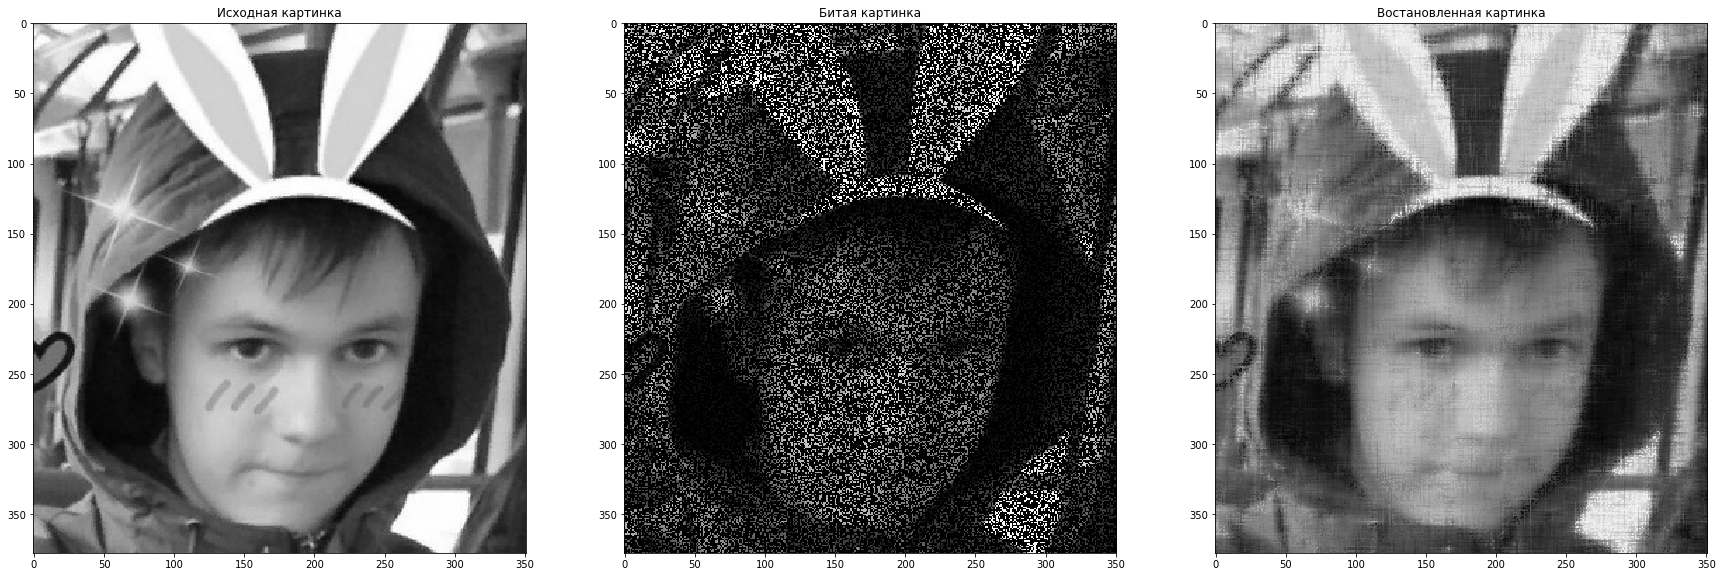

In [110]:
from IPython.display import clear_output
image = Image.open('Screenshot.jpg')
img = image.convert('L')
mu = 1
A = np.asarray(img, dtype=np.float32).copy()
A = 1/255 * A
index_full, y_true, index_del = beat_img(A, 0.7)
true_img = fillNA(np.zeros(A.shape), index_full, y_true)
X = np.random.random(A.shape)
X = fillNA(X, index_full, y_true)
X, k = fast_grad_des(X, index_full, y_true, mu)
plt.figure(figsize = (30,10))
plt.subplot(1,3,1)
plt.imshow(A, cmap = 'gray')
plt.title('Исходная картинка')
plt.subplot(1,3,2)
plt.imshow(fillNA(A, index_del, 0), cmap = 'gray')
plt.title('Битая картинка')
plt.subplot(1,3,3)
plt.imshow(X, cmap = 'gray')
plt.title('Востановленная картинка')

Сравнив полученную картинку, можно сделать вывод, что метод работает

Для того, что-бы выполнить проксимальный градентный спуск, запишем эквивалентную задачу:
$$
min_{X} \frac{1}{2}\cdot||P(A) - P(X)||_F^2 + \lambda ||X||_{tr} \\
\begin{equation*}
P(X_{i,j}) = 
 \begin{cases}
 0 & (i,j) \ \notin \Omega \\
 X_{i,j} & else
 \end{cases}
\end{equation*}
$$
Тогда, задачу можно записать как:
$$
min_{X} f(x) + h(x)
f(x) = \frac{1}{2}\cdot||P(A) - P(X)||_F^2 
h(x) = \lambda ||X||_{tr}
$$
Тогда :
$$
\nabla f(x) = P(A) - P(X)
Prox_{h,t}(Y) = argmin_{x} \frac{1}{2t}||X - Y||_F^2 + \lambda ||X||_{tr}
$$
Докажем, что $Prox_{h,t}(Y) = U\Sigma_{\lambda}V^T$, где $\Sigma_{\lambda, i,i} = max([0,\sigma_Y - \lambda])$, а U и V матрицы при сингулярном разложении.
Согласно условию, $Prox_{h,t}(Y) = Z$, тогда когда:
$$
0 \in Z - B + \lambda \cdot t \cdot \delta ||Z||_{tr}
$$
Тогда, если $Z = U \Sigma V^T$, то верно следующее:
$$
\delta ||Z||_tr = \{ UV^T + ||W|| : ||W|| \leq 1, U^TW=0, WV=0\}
$$
Подставим $Z = U\Sigma_{\lambda}V^T$ и получим, что условие истино.
Тогда, шаг проксимального градиентного спуска имеет вид:
$$
X_{k+1} = Prox_{h,t}(X + t(P(A) - P(X)))
$$
Так как $\frac{1}{2}\cdot||P(A) - P(X)||_F^2$ имеет липшцевый градиент с параметро 1, то шаг можно переписать как:
$$
X_{k+1} = Prox_{h,t}(X + (P(A) - P(X)))
$$

In [111]:
#прокс функция
def Prox(alp, X):
    #svd разложение
    S, V, D = np.linalg.svd(X)
    res = np.zeros(X.shape)
    for i in range(V.shape[0]):
        res += max(V[i] - alp, 0)*np.outer(S[:,i],D.T[:,i])
    return res
#исходная функция
def f(alp, X, A):
    f1 = np.linalg.norm(fillNA(A, index_del, 0)- fillNA(X, index_del, 0), 'fro')**2
    f2 = np.linalg.norm(X, 'nuc')
    return f1 + alp*f2
#проксимальный градиентный спуск
def prox_grad_des(X0, alp, index_del,e = 0.0001, max_iter = 1000):
    #иницилизация параметров
    X = X0.copy()
    k = 0
    #реализация схемы
    while(True):
        #print(k)
        f1 = f(alp, X, A)
        X = Prox(alp, X + fillNA(A, index_del, 0)- fillNA(X, index_del, 0))
        k+=1
        f2 = f(alp, X, A)
        if(abs(f1 - f2) < e):
            return X, k
        #print(abs(f1 - f2))
        if(k >= max_iter):
            print('Достигнуто максимальное число итераций')
            print('PD',abs(f1 - f2))
            return X, k


Реализуем полученный метод и проверим его работо способность как у преведущего метода.

Text(0.5, 1.0, 'Востановленная картинка')

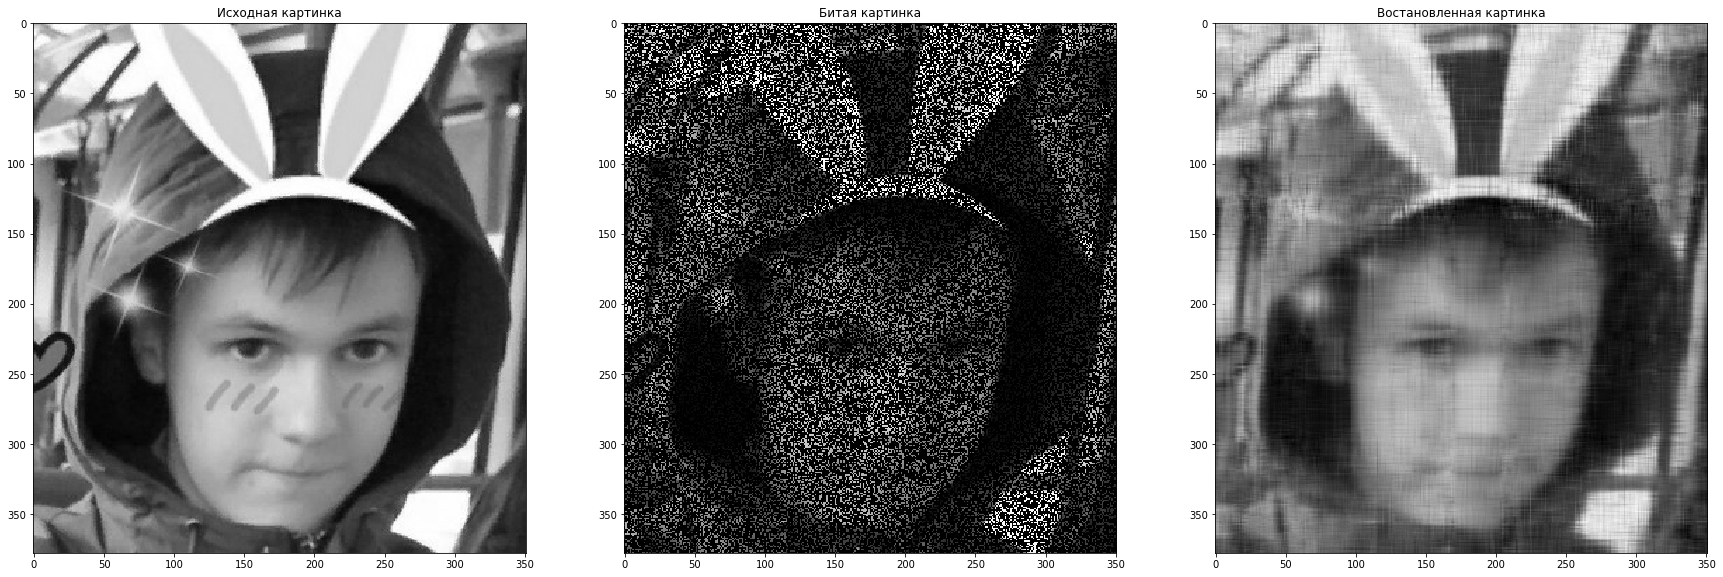

In [112]:
X = np.random.random(A.shape)
alp = 1
X, k = prox_grad_des(X, alp, index_del, max_iter = 150)
plt.figure(figsize = (30,10))
plt.subplot(1,3,1)
plt.imshow(A, cmap = 'gray')
plt.title('Исходная картинка')
plt.subplot(1,3,2)
plt.imshow(fillNA(A, index_del, 0), cmap = 'gray')
plt.title('Битая картинка')
plt.subplot(1,3,3)
plt.imshow(X, cmap = 'gray')
plt.title('Востановленная картинка')

Сравнив полученную картинку, можно сделать вывод, что метод работает

Сделаем так, что каждый из каналов цветов будет востанавливаться по отдельности. Тогда можно востановить и цветное изображение. Так же построим график невязки для каждого из каналов на каждой итерации и сравним скорость сходимости этих методов. Так же построим график функции потерь по каждому пискселю. <p>
Для этого слегка перепишем полученные нами методы <p>

In [102]:
def error_img(X, A):
    return ((X - A)**2).sum().sum()

def fast_grad_des(X0, C, index_full, y, mu, e = 0.0001, max_iter = 1000):
    #иницилизация параметров
    X = X0.copy()
    k = 0
    acc_gradX = 0
    eps = []
    error = []
    #реализация схемы
    while(True):
        new_grad = gradX(X, mu)
        f1 = fu(X, mu)
        acc_gradX = acc_gradX + (k+1)/2*new_grad
        y = 1/mu*X - new_grad
        z = -mu*acc_gradX
        X = 2/(k+3)*z + (k+1)/(k+3)*y
        X = fillNA(X, index_full, y_true)
        f2 = fu(X, mu)
        #критерий остановы
        eps.append(abs(f1 - f2))
        error.append(error_img(X, C))
        if (abs(f1 - f2) < e):
            return X, k,eps, error
        grad = new_grad
        k += 1
        if(k >= max_iter):
            print('Достигнуто максимальное количество итераций')
            print('GD',abs(f1 - f2))
            return X, k, eps, error
        
def prox_grad_des(X0, C, alp, index_del,e = 0.0001, max_iter = 1000):
    #иницилизация параметров
    X = X0.copy()
    k = 0
    eps = []
    error = []
    #реализация схемы
    while(True):
        f1 = f(alp, X, C)
        X = Prox(alp, X + fillNA(C, index_del, 0)- fillNA(X, index_del, 0))
        k+=1
        f2 = f(alp, X,  C)
        eps.append(abs(f1 - f2))
        error.append(error_img(X, C))
        if(abs(f1 - f2) < e):
            return X, k, eps, error
        #print(abs(f1 - f2))
        if(k >= max_iter):
            print('Достигнуто максимальное число итераций')
            print('PD',abs(f1 - f2))
            return X, k, eps, error        

def error_img(X, A):
    return ((X - A)**2).sum().sum()

def retake(X, ind):
    X_copy = X.copy().reshape(-1)
    return X_copy[ind]

def fast_grad_des(X0, C, index_full, y, mu, e = 0.0001, max_iter = 1000):
    #иницилизация параметров
    X = X0.copy()
    k = 0
    acc_gradX = 0
    eps = []
    error = []
    #реализация схемы
    while(True):
        new_grad = gradX(X, mu)
        f1 = fu(X, mu)
        acc_gradX = acc_gradX + (k+1)/2*new_grad
        y = 1/mu*X - new_grad
        z = -mu*acc_gradX
        X = 2/(k+3)*z + (k+1)/(k+3)*y
        X = fillNA(X, index_full, y_true)
        f2 = fu(X, mu)
        eps.append(abs(f1 - f2))
        error.append(error_img(X, C))
        #критерий остановы
        if (abs(f1 - f2) < e):
            return X, k, eps, error
        grad = new_grad
        k += 1
        if(k >= max_iter):
            print('Достигнуто максимальное количество итераций')
            print('GD',abs(f1 - f2))
            return X, k, eps, error

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0, 0.5, 'log error')

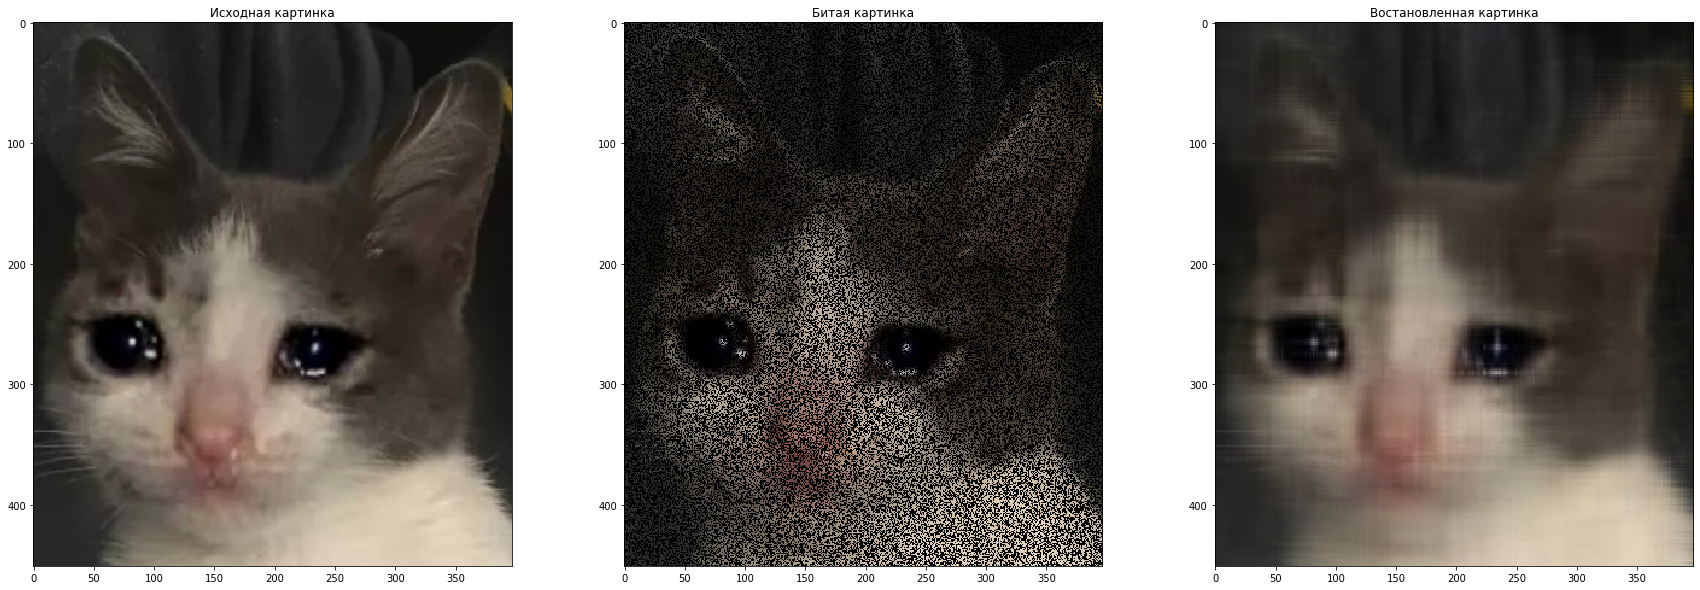

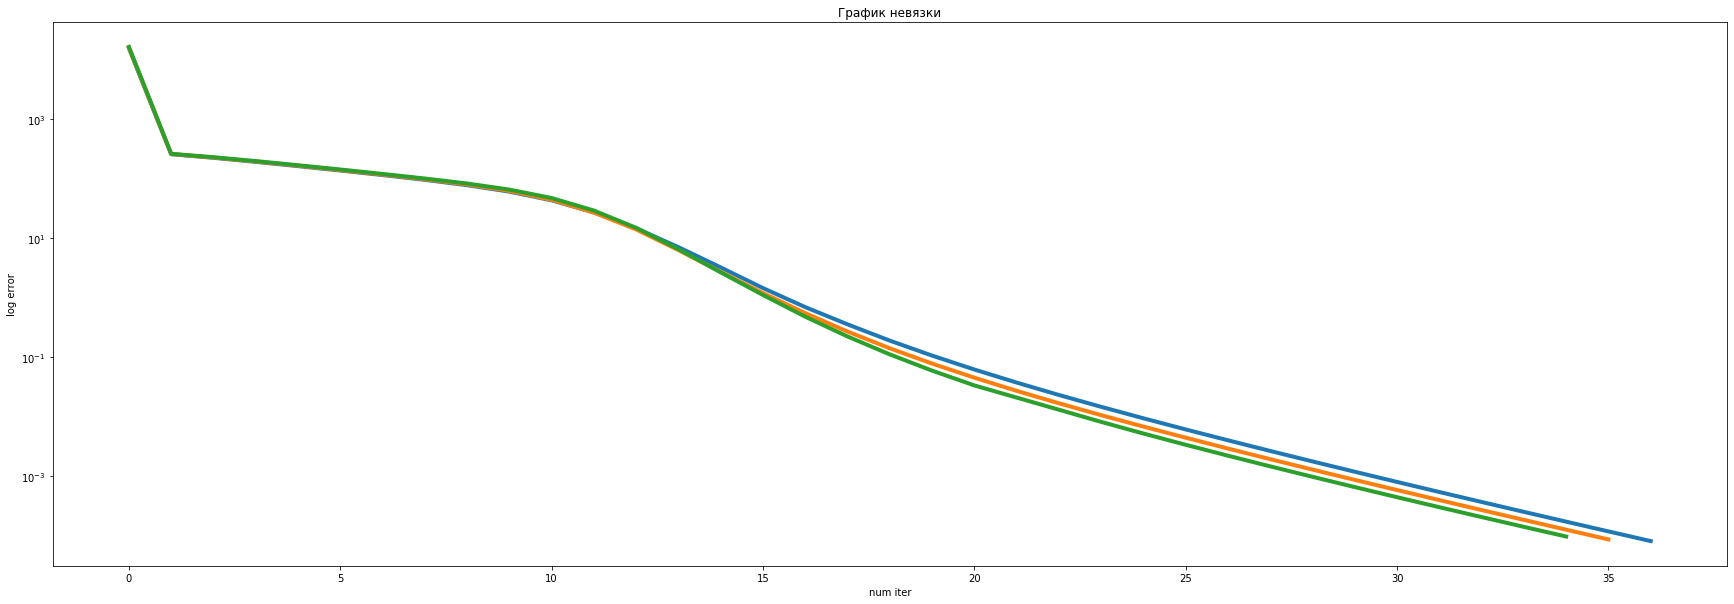

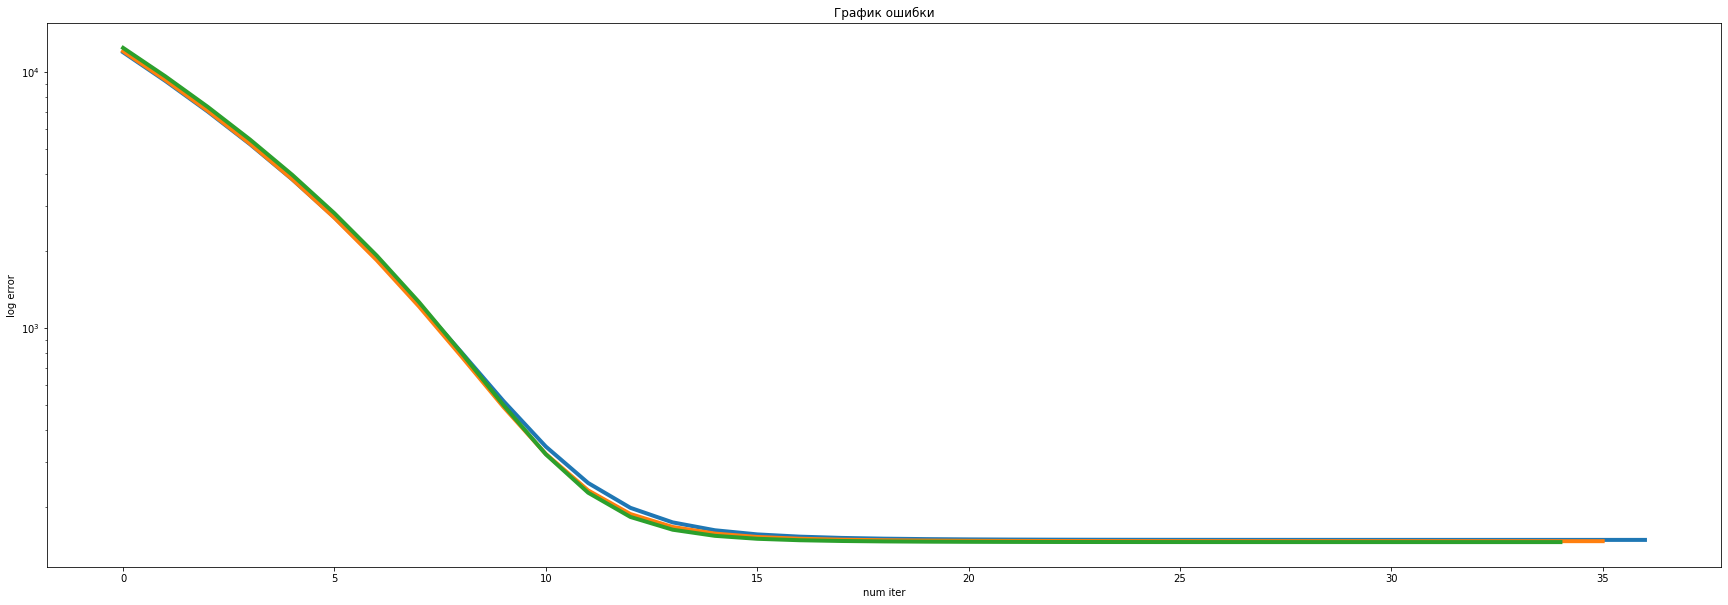

In [105]:
image = Image.open('cat.jpg')
alp = 1
A = np.asarray(image, dtype=np.float32).copy()
A = A/255
X = np.random.random(A.shape)
R, G, B = A[:,:,0], A[:,:,1], A[:,:,2]
res, eps_chanel, error_chanel = [], [], []
index_full,_ ,index_del = beat_img(R, 0.5)

del_img = []
for chanal in [R, G, B]:
    del_img.append(fillNA(chanal, index_del, np.zeros(len(index_del))))
del_img = f_rec(del_img)

for chanal in [R, G, B]:
    X = np.random.random(chanal.shape)
    X, k, eps, error = prox_grad_des(X, chanal, alp, index_del, max_iter = 150)
    res.append(X)
    eps_chanel.append(eps)
    error_chanel.append(error)

rec_img = f_rec(res)

plt.figure(figsize = (30,10))
plt.subplot(1,3,1)
plt.imshow(A)
plt.title('Исходная картинка')
plt.subplot(1,3,2)
plt.imshow(del_img)
plt.title('Битая картинка')
plt.subplot(1,3,3)
plt.imshow(rec_img)
plt.title('Востановленная картинка')
plt.figure(figsize = (30,10))
for e in eps_chanel:
    plt.plot(list(range(len(e))), e, linewidth = 4)
plt.title('График невязки')
plt.yscale('log')
plt.xlabel('num iter')
plt.ylabel('log error')
fig = plt.figure(figsize = (30,10))
for e in error_chanel:
    plt.plot(list(range(len(e))), e, linewidth = 4)
plt.title('График ошибки')
plt.yscale('log')
plt.xlabel('num iter')
plt.ylabel('log error')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0, 0.5, 'log error')

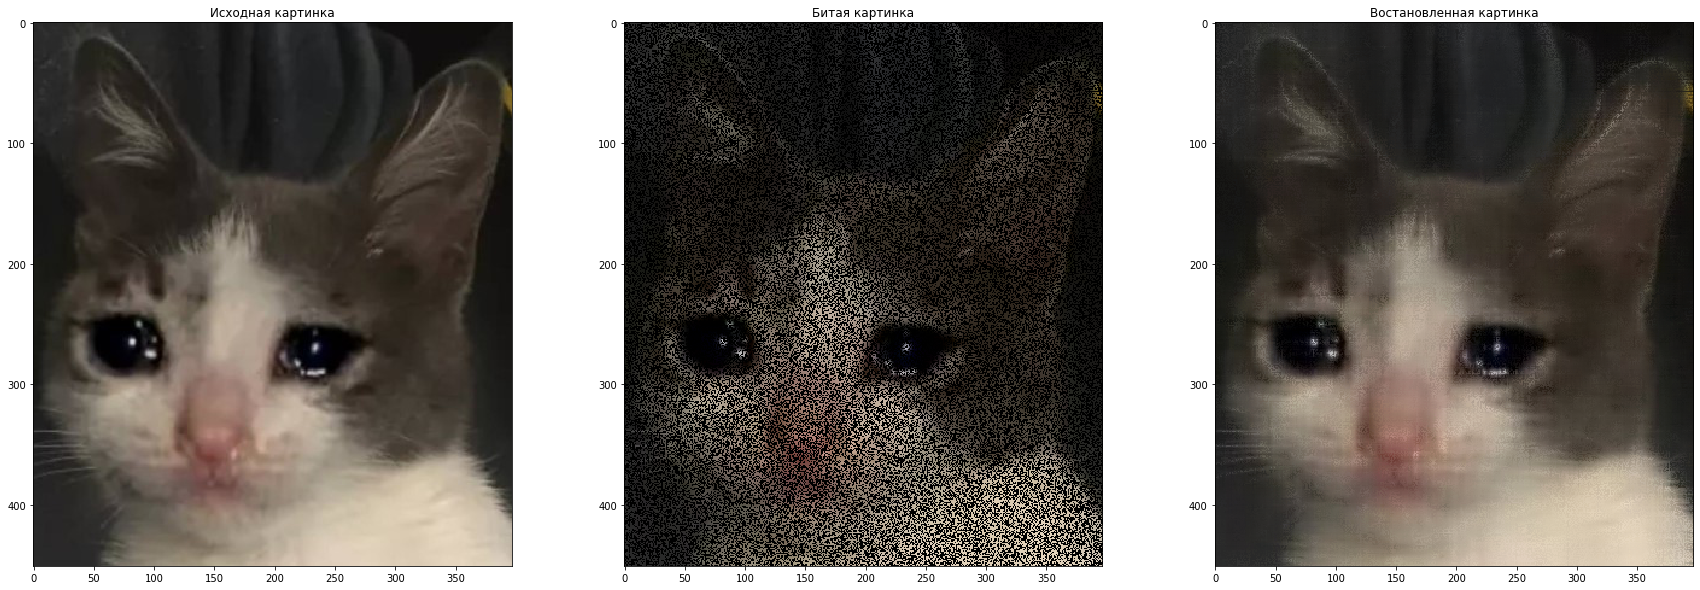

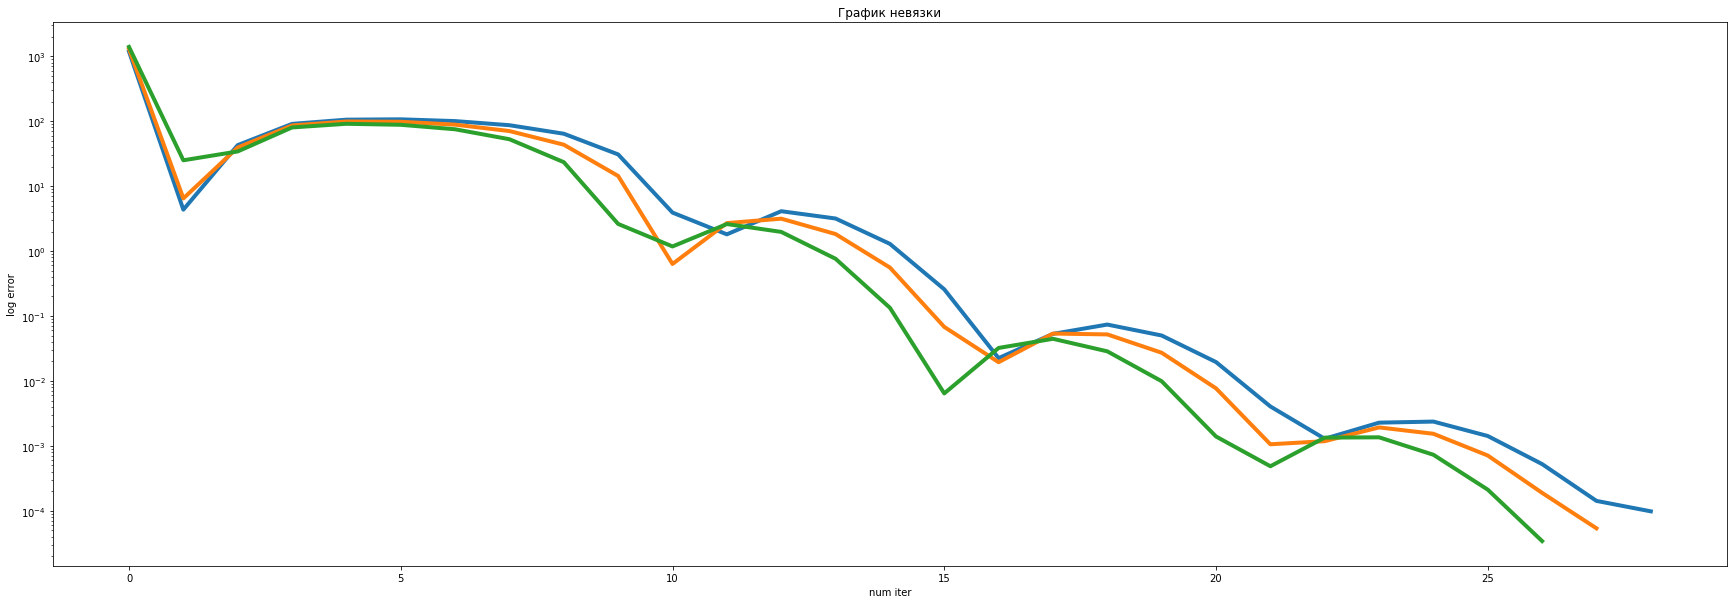

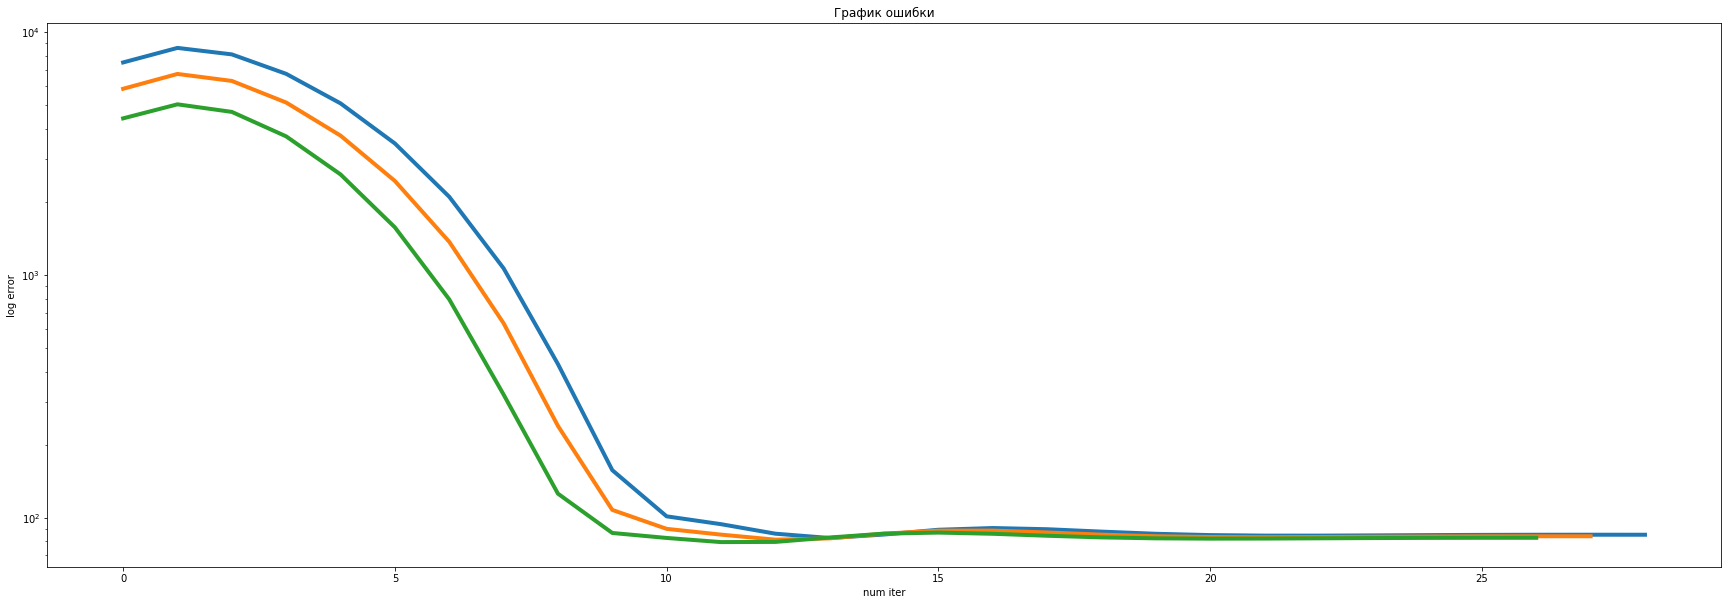

In [106]:
mu = 1
res, eps_chanel, error_chanel = [], [], []
for chanal in [R, G, B]:
    X = np.random.random(chanal.shape)
    y_true = retake(chanal, index_full)
    X, k, eps, error = fast_grad_des(X, chanal, index_full, y_true, mu)
    res.append(X)
    eps_chanel.append(eps)
    error_chanel.append(error)

rec_img = f_rec(res)
plt.figure(figsize = (30,10))
plt.subplot(1,3,1)
plt.imshow(A)
plt.title('Исходная картинка')
plt.subplot(1,3,2)
plt.imshow(del_img)
plt.title('Битая картинка')
plt.subplot(1,3,3)
plt.imshow(rec_img)
plt.title('Востановленная картинка')
plt.figure(figsize = (30,10))
for e in eps_chanel:
    plt.plot(list(range(len(e))), e, linewidth = 4)
plt.title('График невязки')
plt.yscale('log')
plt.xlabel('num iter')
plt.ylabel('log error')
fig = plt.figure(figsize = (30,10))
for e in error_chanel:
    plt.plot(list(range(len(e))), e, linewidth = 4)
plt.title('График ошибки')
plt.yscale('log')
plt.xlabel('num iter')
plt.ylabel('log error')